In [1]:
import pandas as pd
import numpy as np

data = {
    "Date": pd.date_range(start="2024-01-01", periods=20, freq='D'),
    "Close": [100, 102, 101, 105, 107, 110, 112, 115, 118, 120, 122, 121, 123, 126, 128, 127, 130, 133, 135, 137]
}

df = pd.DataFrame(data)
df.to_csv("stock_prices.csv", index=False)

print("Dataset saved as stock_prices.csv")

Dataset saved as stock_prices.csv


In [2]:
df2=pd.read_csv("stock_prices.csv")
print(df2[:5])

         Date  Close
0  2024-01-01    100
1  2024-01-02    102
2  2024-01-03    101
3  2024-01-04    105
4  2024-01-05    107


In [3]:
closing_prices=df2["Close"]
print(closing_prices[:5])

0    100
1    102
2    101
3    105
4    107
Name: Close, dtype: int64


In [6]:
i=0
window_size=5
moving_averages=[]

while i<len(closing_prices)-window_size+1:
    window_average=np.mean(closing_prices[i:i+window_size])
    moving_averages.append(window_average)
    i+=1
    
print(moving_averages)

[103.0, 105.0, 107.0, 109.8, 112.4, 115.0, 117.4, 119.2, 120.8, 122.4, 124.0, 125.0, 126.8, 128.8, 130.6, 132.4]


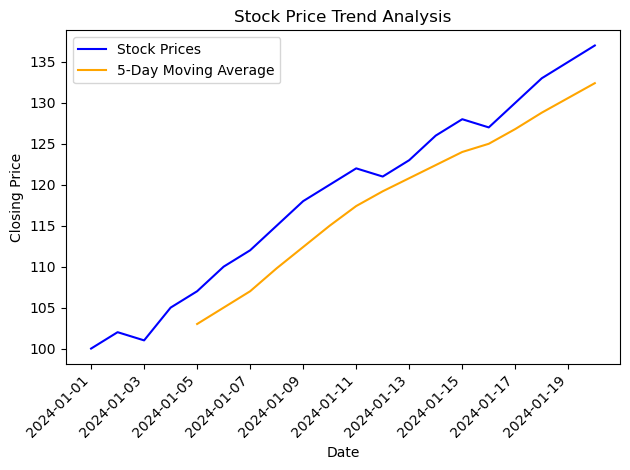

In [9]:
import matplotlib.pyplot as plt

plt.plot(df["Date"], closing_prices, label="Stock Prices", color="blue")
plt.plot(df["Date"][window_size - 1:], moving_averages, label=f"{window_size}-Day Moving Average", color="orange")


plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trend Analysis")
plt.legend()
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()  
plt.show()

In [10]:
print(closing_prices[:5])

0    100
1    102
2    101
3    105
4    107
Name: Close, dtype: int64


In [18]:
period=5
ema=np.zeros(len(closing_prices))
print(ema)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
sma=np.mean(closing_prices[:period])
ema = np.full_like(closing_prices, np.nan, dtype=np.double) 
ema[period-1]=sma
print(ema)

[ nan  nan  nan  nan 103.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]


In [25]:
k=2/(period+1)
for i in range(period,len(closing_prices)):
    ema[i]=closing_prices[i]*k+ema[i-1]*(1-k)
print(ema)

[         nan          nan          nan          nan 103.
 105.33333333 107.55555556 110.03703704 112.69135802 115.12757202
 117.41838134 118.61225423 120.07483615 122.04989077 124.03326051
 125.02217367 126.68144912 128.78763274 130.85842183 132.90561455]


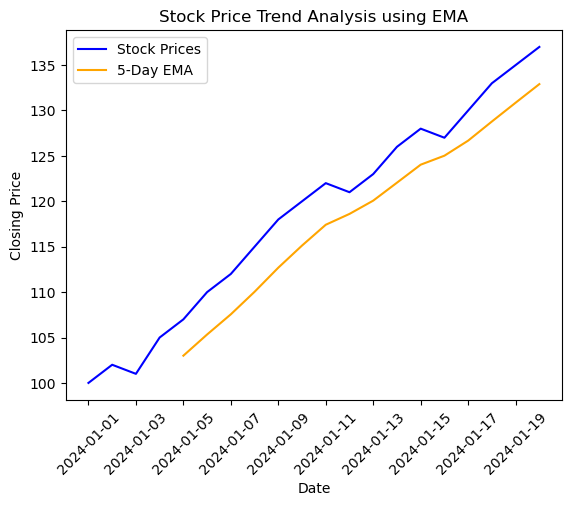

In [28]:
import matplotlib.pyplot as plt

dates = pd.date_range(start="2024-01-01", periods=len(closing_prices))

plt.plot(dates, closing_prices, label="Stock Prices", color="blue")
plt.plot(dates, ema, label="5-Day EMA", color="orange")

plt.title("Stock Price Trend Analysis using EMA")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


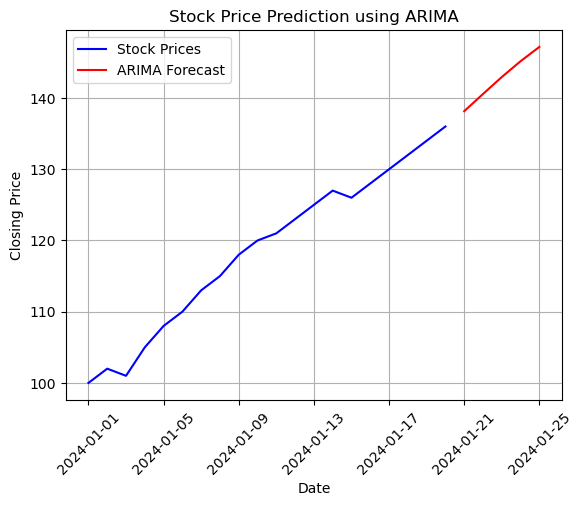

                               SARIMAX Results                                
Dep. Variable:          Closing_Price   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -32.382
Date:                Sun, 23 Mar 2025   AIC                             74.764
Time:                        22:08:32   BIC                             79.486
Sample:                    01-01-2024   HQIC                            75.563
                         - 01-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4031      0.360      3.901      0.000       0.698       2.108
ar.L2         -0.4656      0.373     -1.247      0.212      -1.197       0.266
ma.L1         -1.5338     58.414     -0.026      0.9

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

closing_prices = np.array([100, 102, 101, 105, 108, 110, 113, 115, 118, 120, 
                           121, 123, 125, 127, 126, 128, 130, 132, 134, 136])

dates = pd.date_range(start="2024-01-01", periods=len(closing_prices))

data = pd.DataFrame({"Date": dates, "Closing_Price": closing_prices})
data.set_index("Date", inplace=True)

model = ARIMA(data["Closing_Price"], order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

plt.plot(data.index, data["Closing_Price"], label="Stock Prices", color="blue")

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.plot(future_dates, forecast, label="ARIMA Forecast", color="red")

plt.title("Stock Price Prediction using ARIMA")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

print(model_fit.summary())
